# Furuta Pendulum

Ecuaciones del pendulo de furuta extraidas del artículo "On the Dynamics of the furuta Pendulum" https://www.hindawi.com/journals/jcse/2011/528341/

paper de Astrom y Furuta
https://ieeexplore.ieee.org/document/4776708

paper control furuta https://ieeexplore.ieee.org/document/4108038

https://ieeexplore.ieee.org/author/37276435400

Linealizando la el sistema en el punto de equilibrio superior:

$\theta_{1e}=0$

$\dot\theta_{1e}=\pi$

$\theta_{2e}=0$

$\dot\theta_{2e}=0$

usando Jacobian para linealizar, se obtiene el siguiente sistema en espacio de estado linealizado:

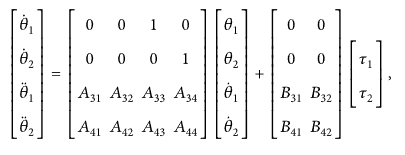


1. A partir del modelo y sus parámetros, obtener los polos, y ceros del sistema considerando la entrada de control torque $\tau_1$ y perturbación torque $\tau_2$. Analizar la controlabilidad y observabilidad del sistema. ¿Cual o cuales considera que deberían ser las mediciones del sistema considerando que el objetivo de control es mantener el péndulo en posición vertical?
2. Analizar restricciones generales de control. Elegir una realimentación de estados usando para diseñar un regulador tal que tenga una repuesta con un sobrepico del 16% ($M_p<=16\%$) y un tiempo de establecimiento al 2% en menos 5 segundos ($t_s^{2\%}<=5$) y **limitaciones de performance**. Justificar elección.
3. Realizar otra realimentación de estados con los polos ubicados de forma tal que el sistema a lazo cerrado minimice el siguiente funcional de costo:

   $$J=\int_0^\infty (x_1^2(t)+0.5x_2^2(t)+0.1x_3^2(t)+0.3x_4^2(t)+u(t))dt$$

Comparar la ubicación de los polos obtenidas mediante este criterio con la anterior.
   
5. Realizar un estimador reducido para la variable $\theta_1$.
6. La perturbación del sistema se representa por la entrada $\tau2$, es decir, torque sobre el eje del péndulo. Investigar la respuesta del sistema realimentado ante perturbaciones. Mostrar en simulación.
7. Obtener el equivalente necesario para estudiar el margen de fase y ganancia del sistema a lazo cerrado para la realimentación de estados obtenida a partir del LQR y el estimador reducido anterior. Verificar si el controlador obtenido es estable.


g)Obtener el equivalente necesario para estudiar el margen de fase y ganancia del sistema a lazo cerrado para la realimentación de estados obtenida a partir del LQR y el estimador reducido anterior. Verificar si el controlador obtenido es estable. Comparar con lo analizado en (b). (20%)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [67]:
g=9.81       #m/s²

L1 = 0.278   #m
L2 = 0.300   #m
l1 = 0.150   #m
l2 = 0.148   #m
m1 = 0.300   #kg
m2 = 0.075   #kg
J1 = 2.48e-2 #kg*m²
J2 = 3.86e-3 #kg*m²
b1 = 1.00e-4 #Nms
b2 = 2.80e-4 #Nms
Lm = 0.005   #H
Rm = 7.8     #ohm
Km = 0.090   #Nm/A

J1_hat = J1 + m1*l1**2
J2_hat = J2 + m2*l2**2

J0_hat = J1 + m1*l1**2+ m2*L1**2

p =  J0_hat*J2_hat-m2**2*L1**2*l2**2

In [152]:
A31 = 0
A32 = g*m2**2*l2**2*L1/p
A33 = -b1*J2_hat/p
A34 = -b2*m2*l2*L1/p

A41 = 0
A42 = g*m2*l2*J0_hat/p
A43 = -b1*m2*l2*L1/p
A44 = -b2*J0_hat/p

B31 = J2_hat/p
B41 = m2*L1*l2/p
B32 = m2*L1*l2/p
B42 = J0_hat/p

#downward position
#A34 = -A34
#A42 = -A42
#A43 = -A43
#B32 = -B32
#B41 = -B41

In [153]:

A = np.matrix([[0  , 0  , 1  ,   0],
               [0  , 0  , 0  ,   1],
               [A31, A32, A33,  A34],
               [A41, A42, A43,  A44]])

B = np.matrix([[0   ,0],
               [0   ,0],
               [B31 ,B32],
               [B41 ,B42]])

B_tau1 = B[:,0]
B_tau2 = B[:,0]

C = np.eye(4)

C_theta1 = C[0,:]
C_theta2 = C[1,:]
C_theta1_2 = C[0:2,:]

D = np.zeros([4,1])


states = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot']
inputs = ['tau1']
outputs = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot']

In [154]:
furuta_T1_theta1 = ctrl.ss(A,B_tau1,C_theta1,0)
furuta_T1_theta1

<LinearIOSystem:sys[73]:['u[0]']->['y[0]']>

In [155]:
furuta_Torque = ctrl.ss(A,B,C,0)
furuta_Torque

<LinearIOSystem:sys[74]:['u[0]', 'u[1]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

(array([ 0.00000000e+00+0.j, -4.58200698e+00+0.j,  4.52852151e+00+0.j,
        -2.67764138e-03+0.j]),
 array([ 4.4230342 +0.j, -4.47391739+0.j]))

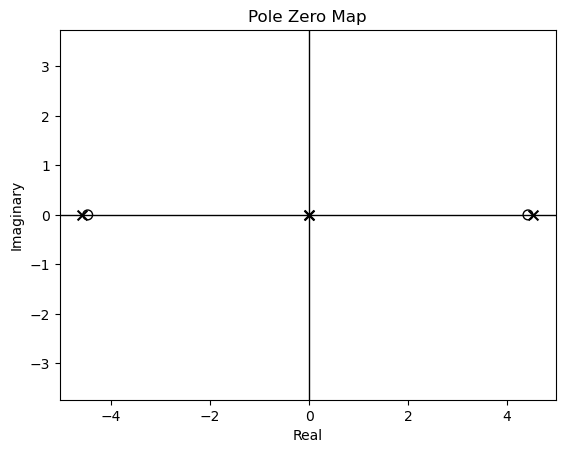

In [156]:
ctrl.pzmap(furuta_Torque[0,0])# tau1 a theta1

(array([ 0.00000000e+00+0.j, -4.58200698e+00+0.j,  4.52852151e+00+0.j,
        -2.67764138e-03+0.j]),
 array([-6.20666445e-18+0.j,  0.00000000e+00+0.j]))

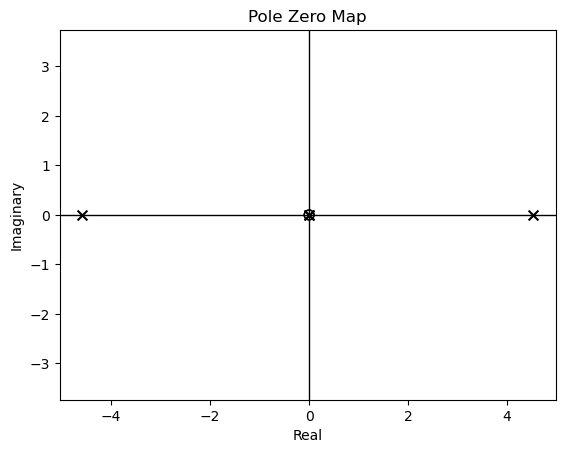

In [157]:
ctrl.pzmap(furuta_Torque[1,0])# tau1 a theta2

In [136]:
furuta_torque.zeros()

array([ 4.4230342 +0.j, -4.47391739+0.j])

In [137]:
Co=ctrl.ctrb(A,B1)
np.linalg.matrix_rank(Co),np.linalg.det(Co)

(4, -76526164.5069937)

In [138]:
Ob1=ctrl.obsv(A,C[0,:])
np.linalg.matrix_rank(Ob1)

4

In [139]:
Ob2=ctrl.obsv(A,C[1,:])
np.linalg.matrix_rank(Ob2)

3

In [140]:
Ob3=ctrl.obsv(A,C[2,:])
np.linalg.matrix_rank(Ob3)

3

In [141]:
Ob4=ctrl.obsv(A,C[3,:])
np.linalg.matrix_rank(Ob4)

3

## Punto 2


### Ubicación de polos del sistema

Las especificaciones en el dominio temporal para el sistema son:

In [142]:
ts=5
sigma = 4/ts

xi=.51
Mp= np.exp(-xi*np.pi/np.sqrt(1-xi**2))

wn=sigma/xi

wd=wn*np.sqrt(1-xi**2)

Mp,sigma,wn,xi,wd 

(0.1552591268514642, 0.8, 1.5686274509803921, 0.51, 1.3492931779154753)

Además, el polo en C+ hace que el sistema requiera un ancho de banda mínimo según:

In [143]:
p_inestable = 4.52
wn= 2*p_inestable
sigma=wn*xi
wd=wn*np.sqrt(1-xi**2)

wn,sigma,wd

(9.04, 4.610399999999999, 7.775976584326884)

In [144]:
p_obj1= [-sigma+wd*1j,-sigma-wd*1j,-4*sigma,-4*sigma]
p_obj1

[(-4.610399999999999+7.775976584326884j),
 (-4.610399999999999-7.775976584326884j),
 -18.441599999999998,
 -18.441599999999998]

### Cálculo de ley de control

In [145]:
K1 = ctrl.acker(A,B1,p_obj1);
print(K1)

[[-50.02296895 139.92881497 -11.19792653  22.8934896 ]]


In [146]:
np.linalg.eigvals(A-B1*K1)# verificación de la ley de control

array([-18.4416+2.82845579e-06j, -18.4416-2.82845579e-06j,
        -4.6104+7.77597658e+00j,  -4.6104-7.77597658e+00j])

In [103]:
sys_cl1 = ctrl.ss(A-B1*K1,B1,C[0:2,:],0,);
sys_cl1

<LinearIOSystem:sys[46]:['u[0]']->['y[0]', 'y[1]']>

In [104]:
sys_cl1.pole()

array([-18.4416+2.94647360e-06j, -18.4416-2.94647360e-06j,
        -4.6104+7.77597658e+00j,  -4.6104-7.77597658e+00j])

In [105]:
t1,y1 =ctrl.step_response(sys_cl1) #escalón Tau1 de 1

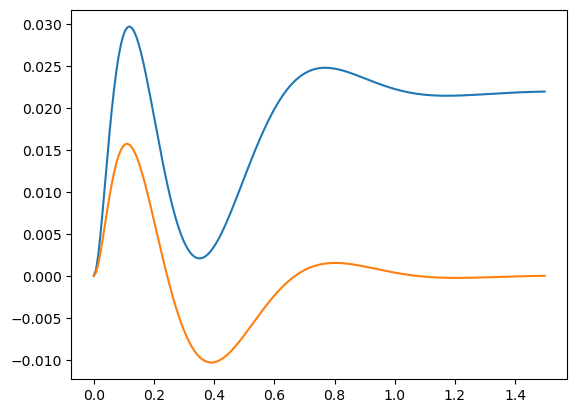

In [106]:
theta_1=y1[0][0,:];
theta_2=y1[1][0,:];

plt.plot(t1,theta_1)#angulo 1 en rad
plt.plot(t1,theta_2)#angulo 2 en rad (a controlar)

In [107]:
ctrl.step_info(sys_cl1)

[[{'RiseTime': 0.0521795488038694,
   'SettlingTime': 1.2001296224889964,
   'SettlingMin': 0.0020853241743525944,
   'SettlingMax': 0.029747029038441057,
   'Overshoot': 35.62464383168595,
   'Undershoot': 0,
   'Peak': 0.029747029038441057,
   'PeakTime': 0.11926754012313007,
   'SteadyStateValue': 0.021933350899972108}],
 [{'RiseTime': 0.0,
   'SettlingTime': nan,
   'SettlingMin': -0.010326895132357525,
   'SettlingMax': 0.001547348757125046,
   'Overshoot': 1.228633689318549e+16,
   'Undershoot': 1.8745660398542944e+16,
   'Peak': 0.01575607691743409,
   'PeakTime': 0.11181331886543444,
   'SteadyStateValue': -8.405186364444527e-17}]]

In [108]:
Nbar=-1/np.abs(sys_cl1(1)[0])
Nbar

array([-54.36485602])

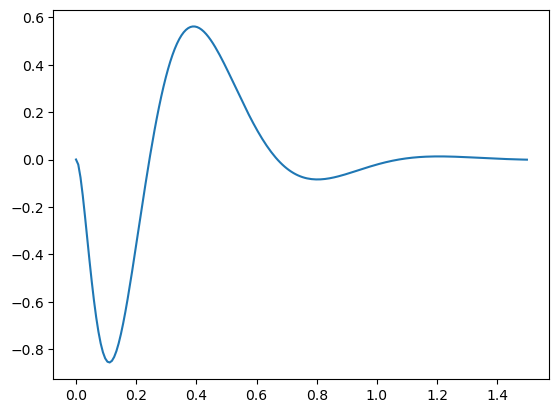

In [109]:
t2,y2 =ctrl.step_response(sys_cl1*Nbar)
plt.plot(t2,y2[1][0,:])

In [110]:
ctrl.step_info(sys_cl1*Nbar)

[[{'RiseTime': 0.0521795488038694,
   'SettlingTime': 1.2001296224889964,
   'SettlingMin': -1.6171929508041796,
   'SettlingMax': -0.11336834850118353,
   'Overshoot': 35.62464383168312,
   'Undershoot': 0,
   'Peak': 1.6171929508041796,
   'PeakTime': 0.11926754012313007,
   'SteadyStateValue': -1.192403463791725}],
 [{'RiseTime': 0.0,
   'SettlingTime': nan,
   'SettlingMin': -0.08412139239935132,
   'SettlingMax': 0.561420167041264,
   'Overshoot': 1.0436639628988634e+16,
   'Undershoot': 1.592351763490241e+16,
   'Peak': 0.8565768531127916,
   'PeakTime': 0.11181331886543444,
   'SteadyStateValue': 5.3793192732444975e-15}]]

In [111]:
p_obj2= [-sigma+.5*wd*1j,-sigma-.5*wd*1j,-4*sigma,-4*sigma];
K2 = ctrl.acker(A,B1,p_obj2);
sys_cl2 = ctrl.ss(A-B1*K2,B1,C[0:2,:],0,);
sys_cl2.pole()

array([-18.4416+1.84890219e-06j, -18.4416-1.84890219e-06j,
        -4.6104+3.88798829e+00j,  -4.6104-3.88798829e+00j])

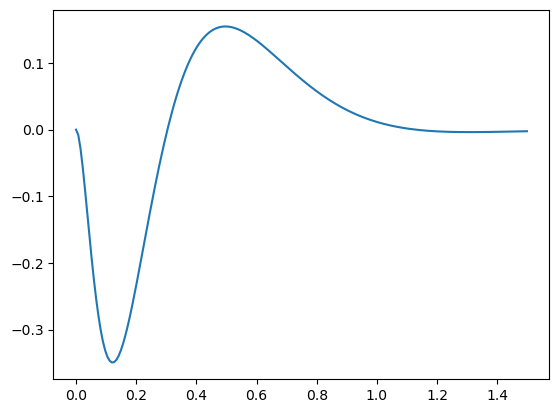

In [112]:
Nbar2=-1/np.abs(sys_cl2(0)[0])
t3,y3 =ctrl.step_response(sys_cl2*Nbar2)
plt.plot(t3,y3[1][0,:])

In [113]:
ctrl.step_info(sys_cl2*Nbar2)

[[{'RiseTime': 0.7752390108003261,
   'SettlingTime': 0.9317776572119304,
   'SettlingMin': -1.0145971197477612,
   'SettlingMax': -0.9037393423391827,
   'Overshoot': 1.4597119747755827,
   'Undershoot': 0,
   'Peak': 1.0145971197477612,
   'PeakTime': 1.1852211799735755,
   'SteadyStateValue': -1.0000000000000053}],
 [{'RiseTime': 0.0,
   'SettlingTime': nan,
   'SettlingMin': -0.003692540431171501,
   'SettlingMax': 0.15483997775193262,
   'Overshoot': 5756861412635425.0,
   'Undershoot': 1.2991501242361644e+16,
   'Peak': 0.34942716510706445,
   'PeakTime': 0.1192675401231271,
   'SteadyStateValue': 2.689659636622136e-15}]]

In [114]:
K3, S, E =ctrl.lqr(A,B1,[[.5,0,0,0],[0,1,0,0],[0,0,.3,0],[0,0,0,.1]],[[1]])
K3, S, E

(array([[0.70710678, 1.76178259, 0.64191591, 0.05428376]]),
 array([[ 0.45414823,  0.03518107,  0.05624549, -0.05539047],
        [ 0.03518107,  2.04911616,  0.08713895, -0.04349654],
        [ 0.05624549,  0.08713895,  0.05015942, -0.04867782],
        [-0.05539047, -0.04349654, -0.04867782,  0.09025317]]),
 array([-16.031094 +0.j       ,  -1.2969875+0.j       ,
         -0.8030408+4.4817805j,  -0.8030408-4.4817805j], dtype=complex64))

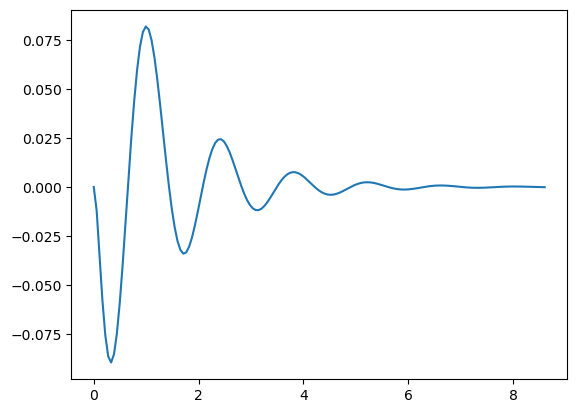

In [115]:

sys_cl3 = ctrl.ss(A-B1*K3,B1,C[0:2,:],0,);
Nbar3=-1/np.abs(sys_cl3(0)[0])
t4,y4 =ctrl.step_response(sys_cl3*Nbar3)
plt.plot(t4,y4[1][0,:])

## Furuta con dinámica del motor

In [116]:

A = np.matrix([[0  , 0  , 1  ,   0 , 0],
               [0  , 0  , 0  ,   1 , 0],
               [A31, A32, A33,  A34, B31*Km],
               [A41, A42, A43,  A44, B41*Km],
               [0  , 0  ,-Km/Lm, 0 , -Rm/Lm ]])

B = np.matrix([[0 ],
               [0 ],
               [0 ],
               [0 ],
               [1/Lm]])

C = np.eye(5)

D = np.zeros([5,1])


states = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot','i']
inputs = ['V']
outputs = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot','i']

In [126]:
A41


0

In [117]:
furuta = ctrl.ss(A,B,C[1,:],D[0,:])#, states=states, inputs=inputs, outputs=outputs)
furuta

<LinearIOSystem:sys[64]:['u[0]']->['y[0]']>

(array([ 0.00000000e+00+0.j       , -1.55997084e+03+0.j       ,
        -2.74182421e-02+4.5551002j, -2.74182421e-02-4.5551002j,
        -3.04845275e-02+0.j       ]),
 array([-9.74915195e-16+0.j,  0.00000000e+00+0.j]))

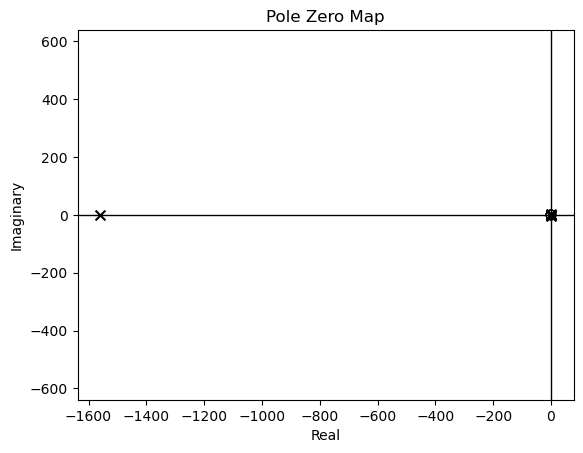

In [118]:
ctrl.pzmap(furuta)

In [124]:
sys,T=ctrl.canonical_form(furuta,'modal')
sys

StateSpace(array([[ 0.00000000e+00,  4.26519075e-12,  3.51344163e-14,
        -7.91895986e-16,  1.40246382e-16],
       [ 0.00000000e+00, -1.55997084e+03,  1.83575377e-13,
         1.43662859e-13,  2.66453526e-15],
       [ 0.00000000e+00, -3.16261774e-15, -2.74182421e-02,
        -9.99964607e-01,  4.82183564e-17],
       [ 0.00000000e+00,  9.01357033e-14,  2.07496723e+01,
        -2.74182421e-02, -1.67916936e-17],
       [ 0.00000000e+00, -4.26687071e-12, -3.90290441e-14,
        -4.21090868e-15, -3.04845275e-02]]), array([[ 1.01351351e+01],
       [ 2.00004083e+02],
       [ 4.05869323e-04],
       [-1.82294509e-01],
       [-1.01400863e+01]]), array([[ 0.00000000e+00, -5.82319204e-07, -9.96599339e-01,
        -1.39351924e-03, -2.63236824e-05]]), array([[0.]]))

In [120]:
Co=ctrl.ctrb(A,B)
np.linalg.matrix_rank(Co),np.linalg.det(Co)

(3, -1606682128904605.5)

Es sistema no es controlable el rango de la matriz de controlabilidad es 3 y el sistema tiene orden 5

hacemos un test de estabilidad, no sé si esta bien, esto lo saque de acá https://electronics.stackexchange.com/questions/432133/how-to-control-state-space-when-it-is-not-controllable


In [123]:
polos=sys.pole()
polo_re_pos=polos[np.real(polos)>0]
polo_re_pos

array([], dtype=complex128)

In [ ]:
np.linalg.matrix_rank(np.hstack([polo_re_pos*np.eye(5), B]))#con rango 5 el sistema es estabilizable

Gramiano es posible calcular solo para sistemas controlables: https://controlautomaticoeducacion.com/sistemas-dinamicos-lineales/gramianos-de-controlabilidad-y-observabilidad/

In [64]:
#G = ctrl.rss(4)
#Wc = ctrl.gram(sys, 'c')
#Wo = ctrl.gram(sys, 'o')
Rc = ctrl.gram(sys, 'cf')  # where Wc = Rc' * Rc
Ro = ctrl.gram(sys, 'of')  # where Wo = Ro' * Ro

sys, Wc, Wo, Rc,Ro

ValueError: Oops, the system is unstable!

In [41]:
t,y=ctrl.step_response(furuta,T=np.linspace(0,400,10000))
y.shape

(10000,)

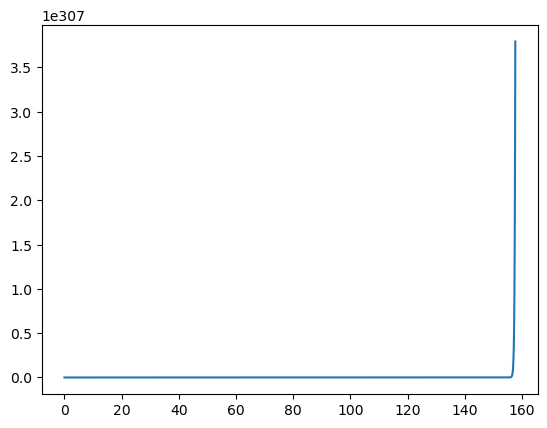

In [42]:
plt.plot(t,y)

In [ ]:
plt.plot(t,y[0,0])

In [ ]:
plt.plot(t,y[1,0])

In [ ]:
plt.plot(t,y[2,0])